In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = {
'note_moyenne': np.random.uniform(10, 20, 100), # Notes moyennes entre 10 et 20
'participation': np.random.randint(0, 100, 100), # Taux de participation en %
'absences': np.random.randint(0, 20, 100) # Nombre d'absences
}
df = pd.DataFrame(data)

In [3]:
df['statut'] = np.where(df['note_moyenne'] >= 12, 1, 0)

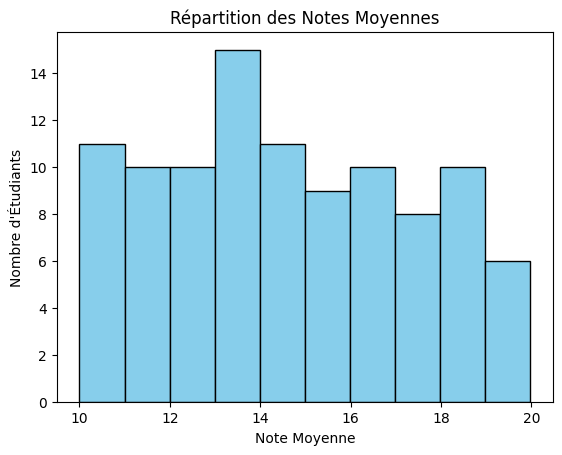

In [4]:
plt.hist(df['note_moyenne'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Note Moyenne')
plt.ylabel('Nombre d\'Étudiants')
plt.title('Répartition des Notes Moyennes')
plt.show()

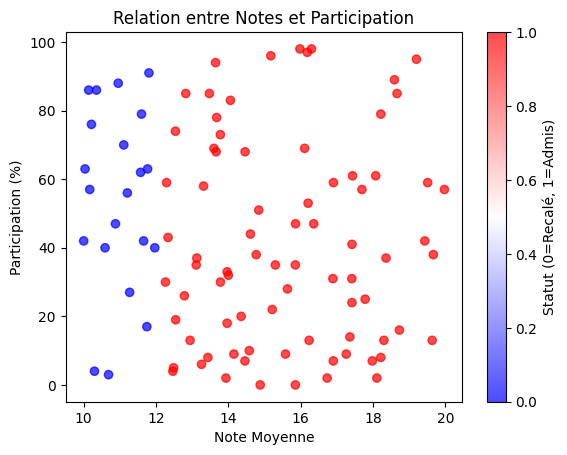

In [ ]:
plt.scatter(df['note_moyenne'], df['participation'], c=df['statut'], cmap='bwr', alpha=0.7)
plt.xlabel("Note Moyenne")
plt.ylabel("Participation (%)")
plt.title("Relation entre Notes et Participation")
plt.colorbar(label="S                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   tatut (0=Recalé, 1=Admis)")
plt.show()

In [6]:
X = df[['note_moyenne', 'participation', 'absences']]
y = df['statut']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
y_pred = model.predict(X_test)

In [10]:
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

Matrice de confusion :
[[ 3  0]
 [ 0 17]]

Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        17

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



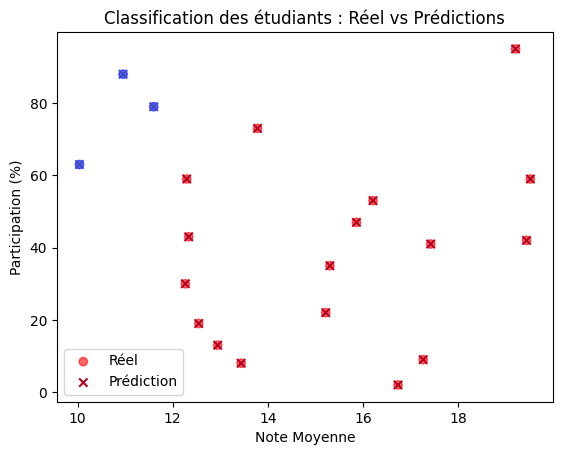

In [11]:
plt.scatter(X_test['note_moyenne'], X_test['participation'], c=y_test, cmap='bwr', alpha=0.6,
label='Données réelles')
plt.scatter(X_test['note_moyenne'], X_test['participation'], c=y_pred, cmap='coolwarm',
marker='x', label='Prédictions du modèle')
plt.xlabel("Note Moyenne")
plt.ylabel("Participation (%)")
plt.legend(["Réel", "Prédiction"])
plt.title("Classification des étudiants : Réel vs Prédictions")
plt.show()